In [1]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
import os

In [2]:
ratio_pvi_cd = {'easy': defaultdict(list), 'hard' : defaultdict(list)}
ratio_el2n_cd =  {'easy': defaultdict(list), 'hard' : defaultdict(list)}
ratio_vog_cd =  {'easy': defaultdict(list), 'hard' : defaultdict(list)}

In [3]:
def get_data_ratio(folder_name, prune_rate):
    df = pd.read_csv(os.path.join(folder_name, f'sexist_data_undersample_{prune_rate}_train.csv')) if prune_rate != 0 else pd.read_csv(
        os.path.join(folder_name, 'sexist_data_train.csv'))
    df_1 = df[df['numeric_labels'] == 1]
    df_2 = df[df['numeric_labels'] == 0]
    return df_1.shape[0] / df_2.shape[0]

In [4]:
def get_ratios(inf_score, dict_ratio):
    folder_name = 'sexism_data'
    dict_ratio['easy']['prune_rate'].append(0)
    dict_ratio['easy']['ratio'].append(get_data_ratio(folder_name = folder_name , prune_rate = 0))
    dict_ratio['hard']['prune_rate'].append(0)
    dict_ratio['hard']['ratio'].append(get_data_ratio(folder_name = folder_name , prune_rate = 0))
    for prune_rate in (5, 10, 15, 20, 25, 30, 35, 40, 50, 60):
        dict_ratio['easy']['prune_rate'].append(prune_rate)
        dict_ratio['easy']['ratio'].append(get_data_ratio(folder_name = f'cmsb_{inf_score}_easy' , prune_rate = prune_rate))
        dict_ratio['hard']['prune_rate'].append(prune_rate)
        dict_ratio['hard']['ratio'].append(get_data_ratio(folder_name = f'cmsb_{inf_score}_hard', prune_rate = prune_rate))

In [5]:
get_ratios('pvi', ratio_pvi_cd)
get_ratios('el2n', ratio_el2n_cd)
get_ratios('vog', ratio_vog_cd)

In [6]:
ratio_random_cd = defaultdict(list)

In [7]:
def get_random_ratios(dict_ratio):
    folder_name = os.path.join(os.path.expanduser('~/work'), 'combined_data')
    dict_ratio['prune_rate'].append(0)
    dict_ratio['ratio'].append(get_data_ratio(folder_name = folder_name , prune_rate = 0))
    for prune_rate in (5, 10, 15, 20, 25, 30, 35, 40, 50, 60):
        dict_ratio['prune_rate'].append(prune_rate)
        dict_ratio['ratio'].append(get_data_ratio(folder_name = f'random_prune', prune_rate = prune_rate))

In [8]:
get_random_ratios(ratio_random_cd)

In [7]:
ratio_pvi_cd

{'easy': defaultdict(list,
             {'prune_rate': [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60],
              'ratio': [0.1534090909090909,
               0.16147092505407812,
               0.17044996642041638,
               0.1804607508532423,
               0.19174977334542156,
               0.20454545454545456,
               0.2191331376273528,
               0.2360052073647015,
               0.2556406124093473,
               0.3068181818181818,
               0.38349954669084313]}),
 'hard': defaultdict(list,
             {'prune_rate': [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60],
              'ratio': [0.1534090909090909,
               0.1614914736574192,
               0.17047286405158518,
               0.18048641729483714,
               0.19177875170016623,
               0.2045784297920361,
               0.21917098445595856,
               0.23604910714285715,
               0.2556921217005843,
               0.30689238210399034,
               0.38361547762998793]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def get_plots(ratio_pvi, ratio_el2n, ratio_vog):
    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 3))
    fig.tight_layout()
    ax1.plot(ratio_pvi['easy']['prune_rate'], ratio_pvi['easy']['ratio'], marker = 'o', 
             color = 'blue', label = 'easy')
    ax1.plot(ratio_pvi['hard']['prune_rate'], ratio_pvi['hard']['ratio'], marker = 'd',
            color = 'red', label = 'hard')
    #ax1.plot(ratio_random['prune_rate'], ratio_random['ratio'], marker = 's',
    #        color = 'orange', label = 'random')
    ax1.set_ylabel('Sexist/Non-Sexist Ratio')
    ax1.set_xlabel('Prune Rate')
    ax1.legend(loc = 'best')
    ax1.set_title('Pointwise V-Information')
    ax1.set_ylim([-0.05, 0.9])
    ax2.plot(ratio_el2n['easy']['prune_rate'], ratio_el2n['easy']['ratio'], marker = 'o', 
             color = 'blue', label = 'easy')
    ax2.plot(ratio_el2n['hard']['prune_rate'], ratio_el2n['hard']['ratio'], marker = 'd',
            color = 'red', label = 'hard')
    #ax2.plot(ratio_random['prune_rate'], ratio_random['ratio'], marker = 's',
    #        color = 'orange', label = 'random')
    #ax2.set_xlabel('Prune Rate')
    ax2.legend(loc = 'best')
    ax2.set_title('Error L2-Norm')
    ax2.set_ylim([-0.05, 0.9])
    ax3.plot(ratio_vog['easy']['prune_rate'], ratio_vog['easy']['ratio'], marker = 'o', 
             color = 'blue', label = 'easy')
    ax3.plot(ratio_vog['hard']['prune_rate'], ratio_vog['hard']['ratio'], marker = 'd',
            color = 'red', label = 'hard')
    #ax3.plot(ratio_random['prune_rate'], ratio_random['ratio'], marker = 's',
    #        color = 'orange', label = 'random')
    ax3.set_xlabel('Prune Rate')
    ax3.legend(loc = 'best')
    ax3.set_ylim([-0.05, 0.9])
    ax3.set_title('Variance of Gradients')
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    ax3.grid(axis='x')
    plt.savefig(os.path.join('figures', 'ratio.pdf'), bbox_inches = 'tight')
    plt.show()

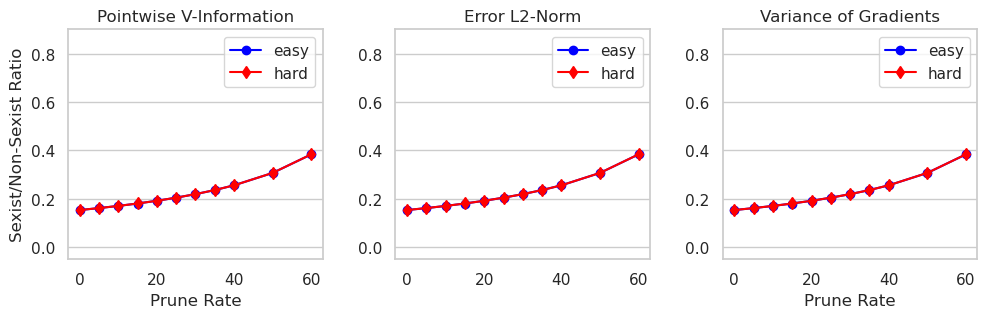

In [10]:
get_plots(ratio_pvi_cd, ratio_el2n_cd, ratio_vog_cd)